# Brincando com Numeros Feitos a Mão - Digitalizados


# Trabalho 3

Curso de Data Science
Prof. MSc. Eng. Marcelo Bianchi

Trabalho 3 – Curso de Data Science
Aplicar PCA e Kernel PCA para reduzir a dimensionalidade e criar classificadores que recebem como entrada as componentes princiais !!!

Integrantes do Grupo:

- Carlos
- Israel
- Lenilson
- Nara

Esse dataset é um conjunto de Imagens de Dígitos feitos a mão com 1797 imagens disponibilizado para validação de modelos de aprendizado de máquina. Depois, acabou sendo usado para validar algoritmos de aprendizado profundo se comportando como uma versão brinquedo da MNIST.

Link UCI: http://archive.ics.uci.edu/ml/datasets/pen-based+recognition+of+handwritten+digits

Artigos de referência:

[1] F. Alimoglu (1996) Combining Multiple Classifiers for Pen-Based Handwritten Digit Recognition, MSc Thesis, Institute of            Graduate Studies in Science and Engineering, Bogazici University.

[2] F. Alimoglu, E. Alpaydin, "Methods of Combining Multiple Classifiers Based on Different Representations for Pen-based              Handwriting Recognition," Proceedings of the Fifth Turkish Artificial Intelligence and Artificial Neural Networks                Symposium (TAINN 96), June 1996, Istanbul, Turkey

In [15]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np


In [16]:
digitis_ds = load_digits()

In [17]:
digitos_im = digitis_ds.images

In [18]:
digitos_im.shape

(1797, 8, 8)

In [19]:
labels = digitis_ds.target

In [20]:
labels.shape

(1797,)

In [21]:
idx = np.arange(len(labels))
print(idx)
np.random.shuffle(idx)
print(idx)

labels = labels[idx]
digitos_im = digitos_im[idx]



[   0    1    2 ... 1794 1795 1796]
[1594  538 1773 ...  769  248 1691]


# Mapeamento do tipo 1 por todos


In [22]:
def one_vs_all(labels):
    lab_unicos = np.unique(labels)
    M = len(lab_unicos)
    #criando a matriz de acomodação
    N = len(labels)
    matriz_one_vs_all = np.zeros((N, M))
    for unico in lab_unicos: 
        matriz_one_vs_all[labels == unico, unico] = 1
    
    return matriz_one_vs_all      
    
mapeamento = one_vs_all(labels)

In [23]:
mapeamento.shape

(1797, 10)

In [24]:
#checando
unicos = np.unique(labels)
soma_map = mapeamento.sum(axis = 0) #somando as linhas

for i in unicos:
    soma_labels_unico = np.sum(labels == i)
    print("NUM {0}\nSoma labels: {1} \t Soma_map: {1}".format(i, soma_labels_unico, soma_map[i] ))
    

NUM 0
Soma labels: 178 	 Soma_map: 178
NUM 1
Soma labels: 182 	 Soma_map: 182
NUM 2
Soma labels: 177 	 Soma_map: 177
NUM 3
Soma labels: 183 	 Soma_map: 183
NUM 4
Soma labels: 181 	 Soma_map: 181
NUM 5
Soma labels: 182 	 Soma_map: 182
NUM 6
Soma labels: 181 	 Soma_map: 181
NUM 7
Soma labels: 179 	 Soma_map: 179
NUM 8
Soma labels: 174 	 Soma_map: 174
NUM 9
Soma labels: 180 	 Soma_map: 180


In [25]:
print(labels[0:20])


[2 2 6 5 2 4 3 0 9 0 4 0 6 7 0 1 6 1 8 8]


In [26]:

def mostrar_multipla_imgs(imagens, labels, linhas = 1, cols=1):
    
    fig, ax = plt.subplots(nrows = linhas, ncols = cols, figsize = (10,10))
    ax = ax.ravel()
    for ind in range(imagens.shape[0]):
        ax[ind].imshow(imagens[ind], cmap = 'gray', aspect = .8)
        ax[ind].set_title(str(labels[ind]).capitalize())
        ax[ind].set_axis_off()
    
    fig.set_size_inches(15,4)
    fig.tight_layout()
    plt.show()

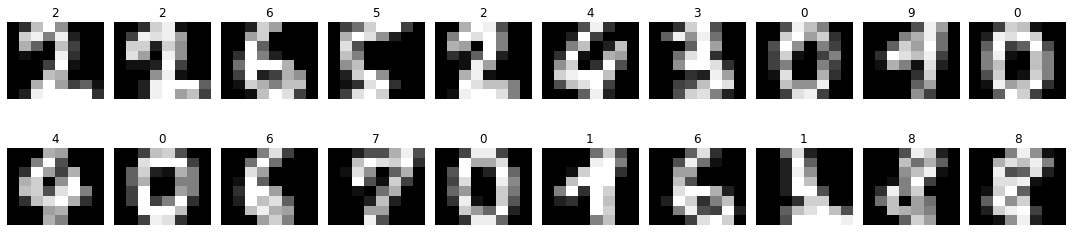

In [27]:
mostrar_multipla_imgs(digitos_im[:20], labels[:20], linhas = 2, cols = 10)

# Rodando o Classificador sem Efetuar a Redução de Dimensionalidade

In [28]:
from sklearn.linear_model import LogisticRegression

def criacao_classificadores(N, cte_penalty = 1, pen = 'l1', sol = 'liblinear', verb = 0):
    
    classificadores = []
    for i in range(N):
        classificadores.append(LogisticRegression(C = cte_penalty, penalty = pen,
                                                  solver = sol, verbose = verb))
    return classificadores

cadeia_classificadores = criacao_classificadores(len(unicos))
print(cadeia_classificadores)

[LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l1', solver='liblinear')]


In [29]:
digitos_modo_vetor = digitos_im.reshape(digitos_im.shape[0], digitos_im.shape[1]*digitos_im.shape[2])

In [30]:
print(digitos_modo_vetor.shape)

(1797, 64)


In [31]:
#Fazendo o Train-Test-Split 

train_len = int(0.7*digitos_modo_vetor.shape[0])
X_train = digitos_modo_vetor[:train_len,:]
X_test = digitos_modo_vetor[train_len:, :]
map_train = mapeamento[:train_len, :]
map_test = mapeamento[train_len:, :]
label_train = labels[:train_len]
label_test = labels[train_len:]



In [32]:
#Função para treinar os Classificadores

def treinar_cadeia(X_train, map_train, cadeia_classificadores):
    
    for idx, clf in enumerate(cadeia_classificadores):
        clf.fit(X_train, map_train[:, idx].ravel())
        cadeia_classificadores[idx] = clf
        print("Treinando Regressor Logistico: {}".format(idx))
        print("Acuracia do Regressor Logistico {0}: {1:.3f} ".format(idx, clf.score(X_train, 
                                                                                   map_train[:, idx].ravel())))
    
    return cadeia_classificadores

cadeia_classificadores = treinar_cadeia(X_train, map_train, cadeia_classificadores)

Treinando Regressor Logistico: 0
Acuracia do Regressor Logistico 0: 1.000 
Treinando Regressor Logistico: 1
Acuracia do Regressor Logistico 1: 0.994 
Treinando Regressor Logistico: 2
Acuracia do Regressor Logistico 2: 1.000 
Treinando Regressor Logistico: 3
Acuracia do Regressor Logistico 3: 0.997 
Treinando Regressor Logistico: 4
Acuracia do Regressor Logistico 4: 1.000 
Treinando Regressor Logistico: 5
Acuracia do Regressor Logistico 5: 1.000 
Treinando Regressor Logistico: 6
Acuracia do Regressor Logistico 6: 1.000 
Treinando Regressor Logistico: 7
Acuracia do Regressor Logistico 7: 1.000 
Treinando Regressor Logistico: 8
Acuracia do Regressor Logistico 8: 0.974 
Treinando Regressor Logistico: 9
Acuracia do Regressor Logistico 9: 0.994 


In [52]:
def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x)))


print(softmax([1,2,3]).sum())

1.0


In [57]:
def validar_cadeia(X_test, labels_test, cadeia_classificadores):
    
    prob_matrix = np.zeros((X_test.shape[0], len(cadeia_classificadores)))
    prob_matrix = prob_matrix.T
    for i in range(len(cadeia_classificadores)):
        clf_teste = cadeia_classificadores[i]
        aux1 = clf_teste.predict_proba(X_test)
        aux2 = np.max(aux1, axis = 1)
        aux3 = np.argmax(aux1, axis = 1)
        aux = aux2*aux3
        prob_matrix[i, :] = aux.ravel()
    for i in range(prob_matrix.shape[0]):
        prob_matrix[:, i] = softmax(prob_matrix[:, i]).ravel()
        
    labels_hat = np.argmax(prob_matrix, axis = 0)
    print("Accuracia: {0:.3f}".format((labels_hat == labels_test).mean()))
    
    return labels_hat, prob_matrix
    

In [58]:
l_hat, prob_matrix = validar_cadeia(X_test, label_test, cadeia_classificadores)

Accuracia: 0.924


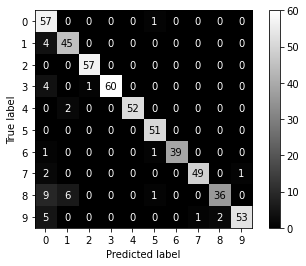

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(label_test, l_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot( cmap = 'gray') 
plt.show()

In [37]:
print(classification_report(label_test, l_hat, labels = unicos))

              precision    recall  f1-score   support

           0       0.70      0.98      0.81        58
           1       0.85      0.92      0.88        49
           2       0.98      1.00      0.99        57
           3       1.00      0.92      0.96        65
           4       1.00      0.96      0.98        54
           5       0.94      1.00      0.97        51
           6       1.00      0.95      0.97        41
           7       0.98      0.94      0.96        52
           8       0.95      0.69      0.80        52
           9       0.98      0.87      0.92        61

    accuracy                           0.92       540
   macro avg       0.94      0.92      0.93       540
weighted avg       0.94      0.92      0.93       540



# Aplicando PCA e K-PCA

In [38]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
kpca = KernelPCA(n_components = 2, kernel = 'poly')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)



In [39]:
cadeia_classificadores_pca = criacao_classificadores(len(unicos))
cadeia_classificadores_kpca = criacao_classificadores(len(unicos))

In [40]:
#Treinando_PCA
cadeia_classificadores_pca = treinar_cadeia(X_train_pca, map_train, cadeia_classificadores_pca)

Treinando Regressor Logistico: 0
Acuracia do Regressor Logistico 0: 0.967 
Treinando Regressor Logistico: 1
Acuracia do Regressor Logistico 1: 0.913 
Treinando Regressor Logistico: 2
Acuracia do Regressor Logistico 2: 0.905 
Treinando Regressor Logistico: 3
Acuracia do Regressor Logistico 3: 0.940 
Treinando Regressor Logistico: 4
Acuracia do Regressor Logistico 4: 0.954 
Treinando Regressor Logistico: 5
Acuracia do Regressor Logistico 5: 0.896 
Treinando Regressor Logistico: 6
Acuracia do Regressor Logistico 6: 0.932 
Treinando Regressor Logistico: 7
Acuracia do Regressor Logistico 7: 0.896 
Treinando Regressor Logistico: 8
Acuracia do Regressor Logistico 8: 0.903 
Treinando Regressor Logistico: 9
Acuracia do Regressor Logistico 9: 0.905 


In [59]:
l_hat_pca, prob_m_pca = validar_cadeia(X_test_pca, label_test, cadeia_classificadores_pca)

Accuracia: 0.307


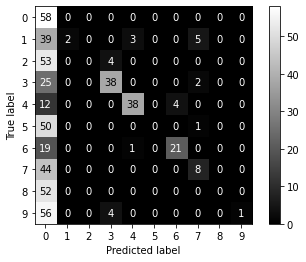

In [42]:
cm = confusion_matrix(label_test, l_hat_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot( cmap = 'gray') 
plt.show()

In [43]:
print(classification_report(label_test, l_hat_pca, labels = unicos))

              precision    recall  f1-score   support

           0       0.14      1.00      0.25        58
           1       1.00      0.04      0.08        49
           2       0.00      0.00      0.00        57
           3       0.83      0.58      0.68        65
           4       0.90      0.70      0.79        54
           5       0.00      0.00      0.00        51
           6       0.84      0.51      0.64        41
           7       0.50      0.15      0.24        52
           8       0.00      0.00      0.00        52
           9       1.00      0.02      0.03        61

    accuracy                           0.31       540
   macro avg       0.52      0.30      0.27       540
weighted avg       0.52      0.31      0.27       540



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#Treinando K_PCA
cadeia_classificadores_kpca = treinar_cadeia(X_train_kpca, map_train, cadeia_classificadores_kpca)

Treinando Regressor Logistico: 0
Acuracia do Regressor Logistico 0: 0.967 
Treinando Regressor Logistico: 1
Acuracia do Regressor Logistico 1: 0.930 
Treinando Regressor Logistico: 2
Acuracia do Regressor Logistico 2: 0.901 
Treinando Regressor Logistico: 3
Acuracia do Regressor Logistico 3: 0.932 
Treinando Regressor Logistico: 4
Acuracia do Regressor Logistico 4: 0.893 
Treinando Regressor Logistico: 5
Acuracia do Regressor Logistico 5: 0.896 
Treinando Regressor Logistico: 6
Acuracia do Regressor Logistico 6: 0.913 
Treinando Regressor Logistico: 7
Acuracia do Regressor Logistico 7: 0.889 
Treinando Regressor Logistico: 8
Acuracia do Regressor Logistico 8: 0.903 
Treinando Regressor Logistico: 9
Acuracia do Regressor Logistico 9: 0.910 


In [45]:
l_hat_kpca, prob_m_kpca = validar_cadeia(X_test_kpca, label_test, cadeia_classificadores_kpca)

0.2351851851851852


In [46]:
print(classification_report(label_test, l_hat_kpca, labels = unicos))

              precision    recall  f1-score   support

           0       0.12      0.97      0.22        58
           1       0.91      0.43      0.58        49
           2       0.00      0.00      0.00        57
           3       0.74      0.35      0.48        65
           4       1.00      0.19      0.31        54
           5       0.00      0.00      0.00        51
           6       0.55      0.29      0.38        41
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        52
           9       1.00      0.08      0.15        61

    accuracy                           0.24       540
   macro avg       0.43      0.23      0.21       540
weighted avg       0.44      0.24      0.21       540



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Aplicando um algoritmo do Estado da Arte de Visualização de Dados

In [47]:
from sklearn import manifold
from matplotlib import offsetbox

In [48]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digitos_im[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

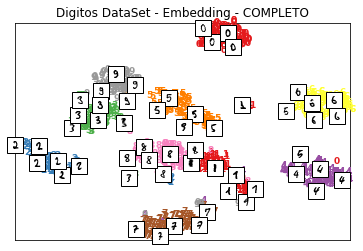

In [49]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X_train)
plot_embedding(X_tsne, label_train, 'Digitos DataSet - Embedding - COMPLETO')

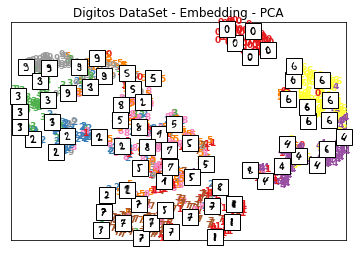

In [50]:
X_tsne = tsne.fit_transform(X_train_pca)
plot_embedding(X_tsne, label_train, 'Digitos DataSet - Embedding - PCA')

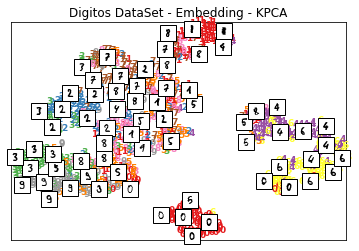

In [51]:
X_tsne = tsne.fit_transform(X_train_kpca)
plot_embedding(X_tsne, label_train, 'Digitos DataSet - Embedding - KPCA')